# Solving the Travelling Salesman Problem with MiniSom

Have you ever heard of the Travelling Salesman Problem? I'm pretty sure you do, but let's refresh our mind looking at its formulation: "Given a list of points and the distances between each pair of points, what is the shortest possible path that visits each point and returns to the starting point?".
What makes this problem so famous and so studied is the fact that it has no "quick" solution as the complexity of calculating the best path increases adding more points. And the complexity increases so fast that, even with modern hardware, it can be impossible to compute an exact solution in a reasonable time. In more rigorous terms, it is an [NP-hard](https://en.wikipedia.org/wiki/NP-hardness) problem. Many heuristics are known to solve this problem and in this post we will see a solution based on [Self-organizing Maps](https://glowingpython.blogspot.com/2013/09/self-organizing-maps.html) (SOM). A SOM is a Neural Network that is capable of mapping an input point into a bi-dimensional space placing points that are close to each other into the same area. Hence, the idea to solve our problem is to train the SOM in order to map the points to visit in single dimension map and visit the points from the one mapped to the first cell (the one on the left) to the last cell (on the right). Points that are mapped to the same cell are visited consecutively.

![img](tmp.assets/somTSP_diag.png)

Let's generate a set of points to test this idea:

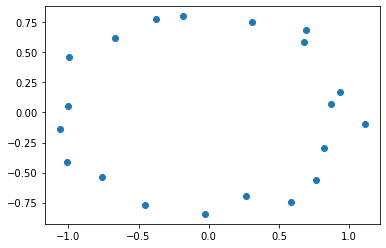

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.RandomState(10)
N_points = 20
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
# x = np.cos(t)*+(np.random.rand(N_points)-.5)*.2
y = np.sin(t)*.8+(np.random.rand(N_points)-.5)*.2
points = np.array([x,y]).T
plt.scatter(x, y)

We can now import MiniSom, our favorite implementation of the Self_Organizing Maps, and see what path it's able to produce:

d:\anaconda\lib\site-packages\minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
d:\anaconda\lib\site-packages\minisom.py:374: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)


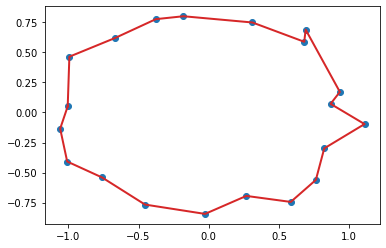

In [20]:
from minisom import MiniSom

som = MiniSom(1, N_neurons*2, 2, sigma=10,
              neighborhood_function='gaussian', random_seed=50)
max_iter = 3000
som.pca_weights_init(points)

paths_x = []
paths_y = []
for i in np.arange(max_iter):
    i_point = i % len(points)
    som.update(points[i_point], som.winner(points[i_point]), i, max_iter)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    paths_x.append(points[visit_order][:,0])
    paths_y.append(points[visit_order][:,1])
    
plt.scatter(x, y, label='point to visit')
plt.plot(paths_x[-1], paths_y[-1],
         'C3', linewidth=2, label='path')

In the snippet above we initialized the SOM and run 2000 training iterations (check [this](https://glowingpython.blogspot.com/2013/09/self-organizing-maps.html) out to discover how that works). At each iteration we have saved the path found and visualized the last solution. As we can see, the line covers all the points and it's easy to see that it's the best possible path with just a glance. However, it's interesting to see how the solution evolves at each iteration:

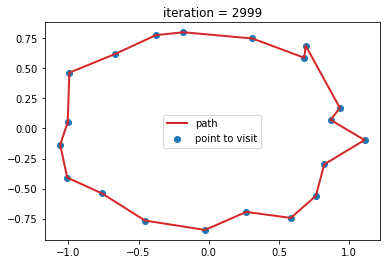

In [21]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
plt.scatter(x, y, label='point to visit')
ln, = plt.plot([], [], 'C3', linewidth=2, label='path')
plt.legend()

def update(frame):
    ln.set_data(paths_x[frame], paths_y[frame])
    plt.title('iteration = %d' % frame)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(max_iter),
                    interval=10, repeat=False, blit=False)
HTML(ani.to_html5_video())


Here we note that the initial path is very messy and presents various loops and that the more the network is trained the more optimal the solution becomes. Notice that the snippet above uses the object *HTML* from the IPython library and it will automatically display the video if a Jupyter notebook is used. The video can be saved in a specific location using *ani.save(filename.mp4)*.

[Email This](https://www.blogger.com/share-post.g?blogID=1693014329567144872&postID=1440145236379185223&target=email)
[BlogThis!](https://www.blogger.com/share-post.g?blogID=1693014329567144872&postID=1440145236379185223&target=blog)
[Share to Twitter](https://www.blogger.com/share-post.g?blogID=1693014329567144872&postID=1440145236379185223&target=twitter)
[Share to Facebook](https://www.blogger.com/share-post.g?blogID=1693014329567144872&postID=1440145236379185223&target=facebook)
[Share to Pinterest](https://www.blogger.com/share-post.g?blogID=1693014329567144872&postID=1440145236379185223&target=pinterest)

Labels: 
[machine learning](https://glowingpython.blogspot.com/search/label/machine_learning), 
[neural network](https://glowingpython.blogspot.com/search/label/neural_network), 
[travelling salesman problem](https://glowingpython.blogspot.com/search/label/travelling_salesman_problem)